In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='SimHei' #顯示中文(for Mac)
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

pd.set_option("display.max_columns",80) #設定pandas最多顯示出50個欄位資訊

In [2]:
X_train = pd.read_csv("./train.csv",header=None)
y_train = pd.read_csv("./trainLabels.csv",header=None)
X_test = pd.read_csv("./test.csv",header=None)

In [3]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,-1.408370,1.114744,0.910415,2.218110,4.305643,0.088924,0.169149,0.413448,1.513862,2.662967,-1.072765,0.149111,0.559579,4.378885,-0.463603,-0.063959,0.544930,0.712772,-1.494050,-2.636169,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,0.935347,1.057796,-0.539275,-0.172662,-0.679051,0.607362,1.148635,2.437077,-0.313069,0.528104,-0.513476,0.766221,-1.466939,-2.318885,1.647223,-1.556443,-1.645581,-0.198467,-1.472066,-1.906147,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,-0.890270,0.909969,-11.851312,3.352420,-4.862125,-0.903317,-1.824344,0.045446,-2.126474,1.161563,-1.027912,-1.078792,1.848525,3.758918,0.623649,-0.091044,-1.033094,-0.254151,-4.377542,-1.196298,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,-0.713474,-0.136399,0.058990,-1.083458,1.622659,-1.685582,-1.222879,-0.215834,0.155612,0.627873,-0.732789,1.337941,1.335689,0.680062,0.504754,1.204808,0.144477,0.673993,1.027921,3.073382,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,-0.416575,0.433862,-12.822821,-0.048248,-5.031497,-0.704413,0.515952,-2.635899,-2.359881,-0.053400,0.741432,1.573043,0.723686,1.735602,0.335774,0.572905,0.625971,0.412084,-4.883833,-5.588332,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [4]:
y_train.head()

,0
0,1
1,0
2,0
3,1
4,0


In [5]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,-0.247797,1.527068,3.359963,1.172500,1.823865,0.032365,-0.506474,0.116775,0.302796,-0.069677,-1.067652,0.268855,-2.114816,-2.829966,-0.379520,2.498289,-0.943095,0.826023,0.738353,-1.250244,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,-0.392141,0.396406,-6.404201,0.892782,-0.277077,-2.277002,0.020142,0.244746,-3.129533,0.646215,0.596033,-0.183858,-1.724840,-4.744641,0.735539,1.987149,0.308611,0.191700,-3.309266,-1.474186,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,-1.152022,0.219019,-1.660207,1.830836,-2.055934,0.361885,0.406346,1.473729,1.697615,0.212823,-0.126665,-0.267433,-2.318000,-2.978056,0.122586,0.411849,-0.591939,-0.112360,-3.033888,-2.880890,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,1.274083,0.482342,-2.988552,-1.349692,-2.031105,0.332186,-1.521289,1.393053,-3.750689,-0.694236,0.363548,-0.585731,0.418254,-1.539170,0.566453,0.122639,1.206677,-0.832908,-0.384298,-3.082768,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,0.583663,-0.157686,-4.037594,-0.449152,1.791508,1.822303,0.287224,1.059293,-0.882400,-0.327075,-0.875657,-0.452281,-2.777583,-4.731511,0.639890,0.985756,0.577993,0.759287,-1.359054,1.191917,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [6]:
len(X_test)

9000

In [7]:
corr = X_train.corr()
print(corr)

          0         1         2         3         4         5         6   \
0   1.000000 -0.029022  0.033437  0.012054 -0.022404  0.037209  0.019134   
1  -0.029022  1.000000  0.014202  0.009663  0.044758 -0.034173 -0.008474   
2   0.033437  0.014202  1.000000  0.007579  0.019658 -0.013532 -0.054348   
3   0.012054  0.009663  0.007579  1.000000  0.023827  0.021305 -0.028903   
4  -0.022404  0.044758  0.019658  0.023827  1.000000  0.027705 -0.338883   
5   0.037209 -0.034173 -0.013532  0.021305  0.027705  1.000000 -0.068367   
6   0.019134 -0.008474 -0.054348 -0.028903 -0.338883 -0.068367  1.000000   
7   0.015277  0.006568 -0.008825 -0.044407  0.206964  0.036041 -0.000915   
8  -0.045568  0.039895  0.019443  0.001253  0.063638  0.031510 -0.031153   
9  -0.023777  0.008368 -0.015920 -0.049892  0.079723 -0.023893  0.065493   
10 -0.037427  0.022105  0.011994 -0.031417 -0.051509 -0.004594 -0.006394   
11  0.012477 -0.034953  0.023328  0.052135 -0.019005 -0.058050  0.036516   
12 -0.004410

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['DFKai-SB'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


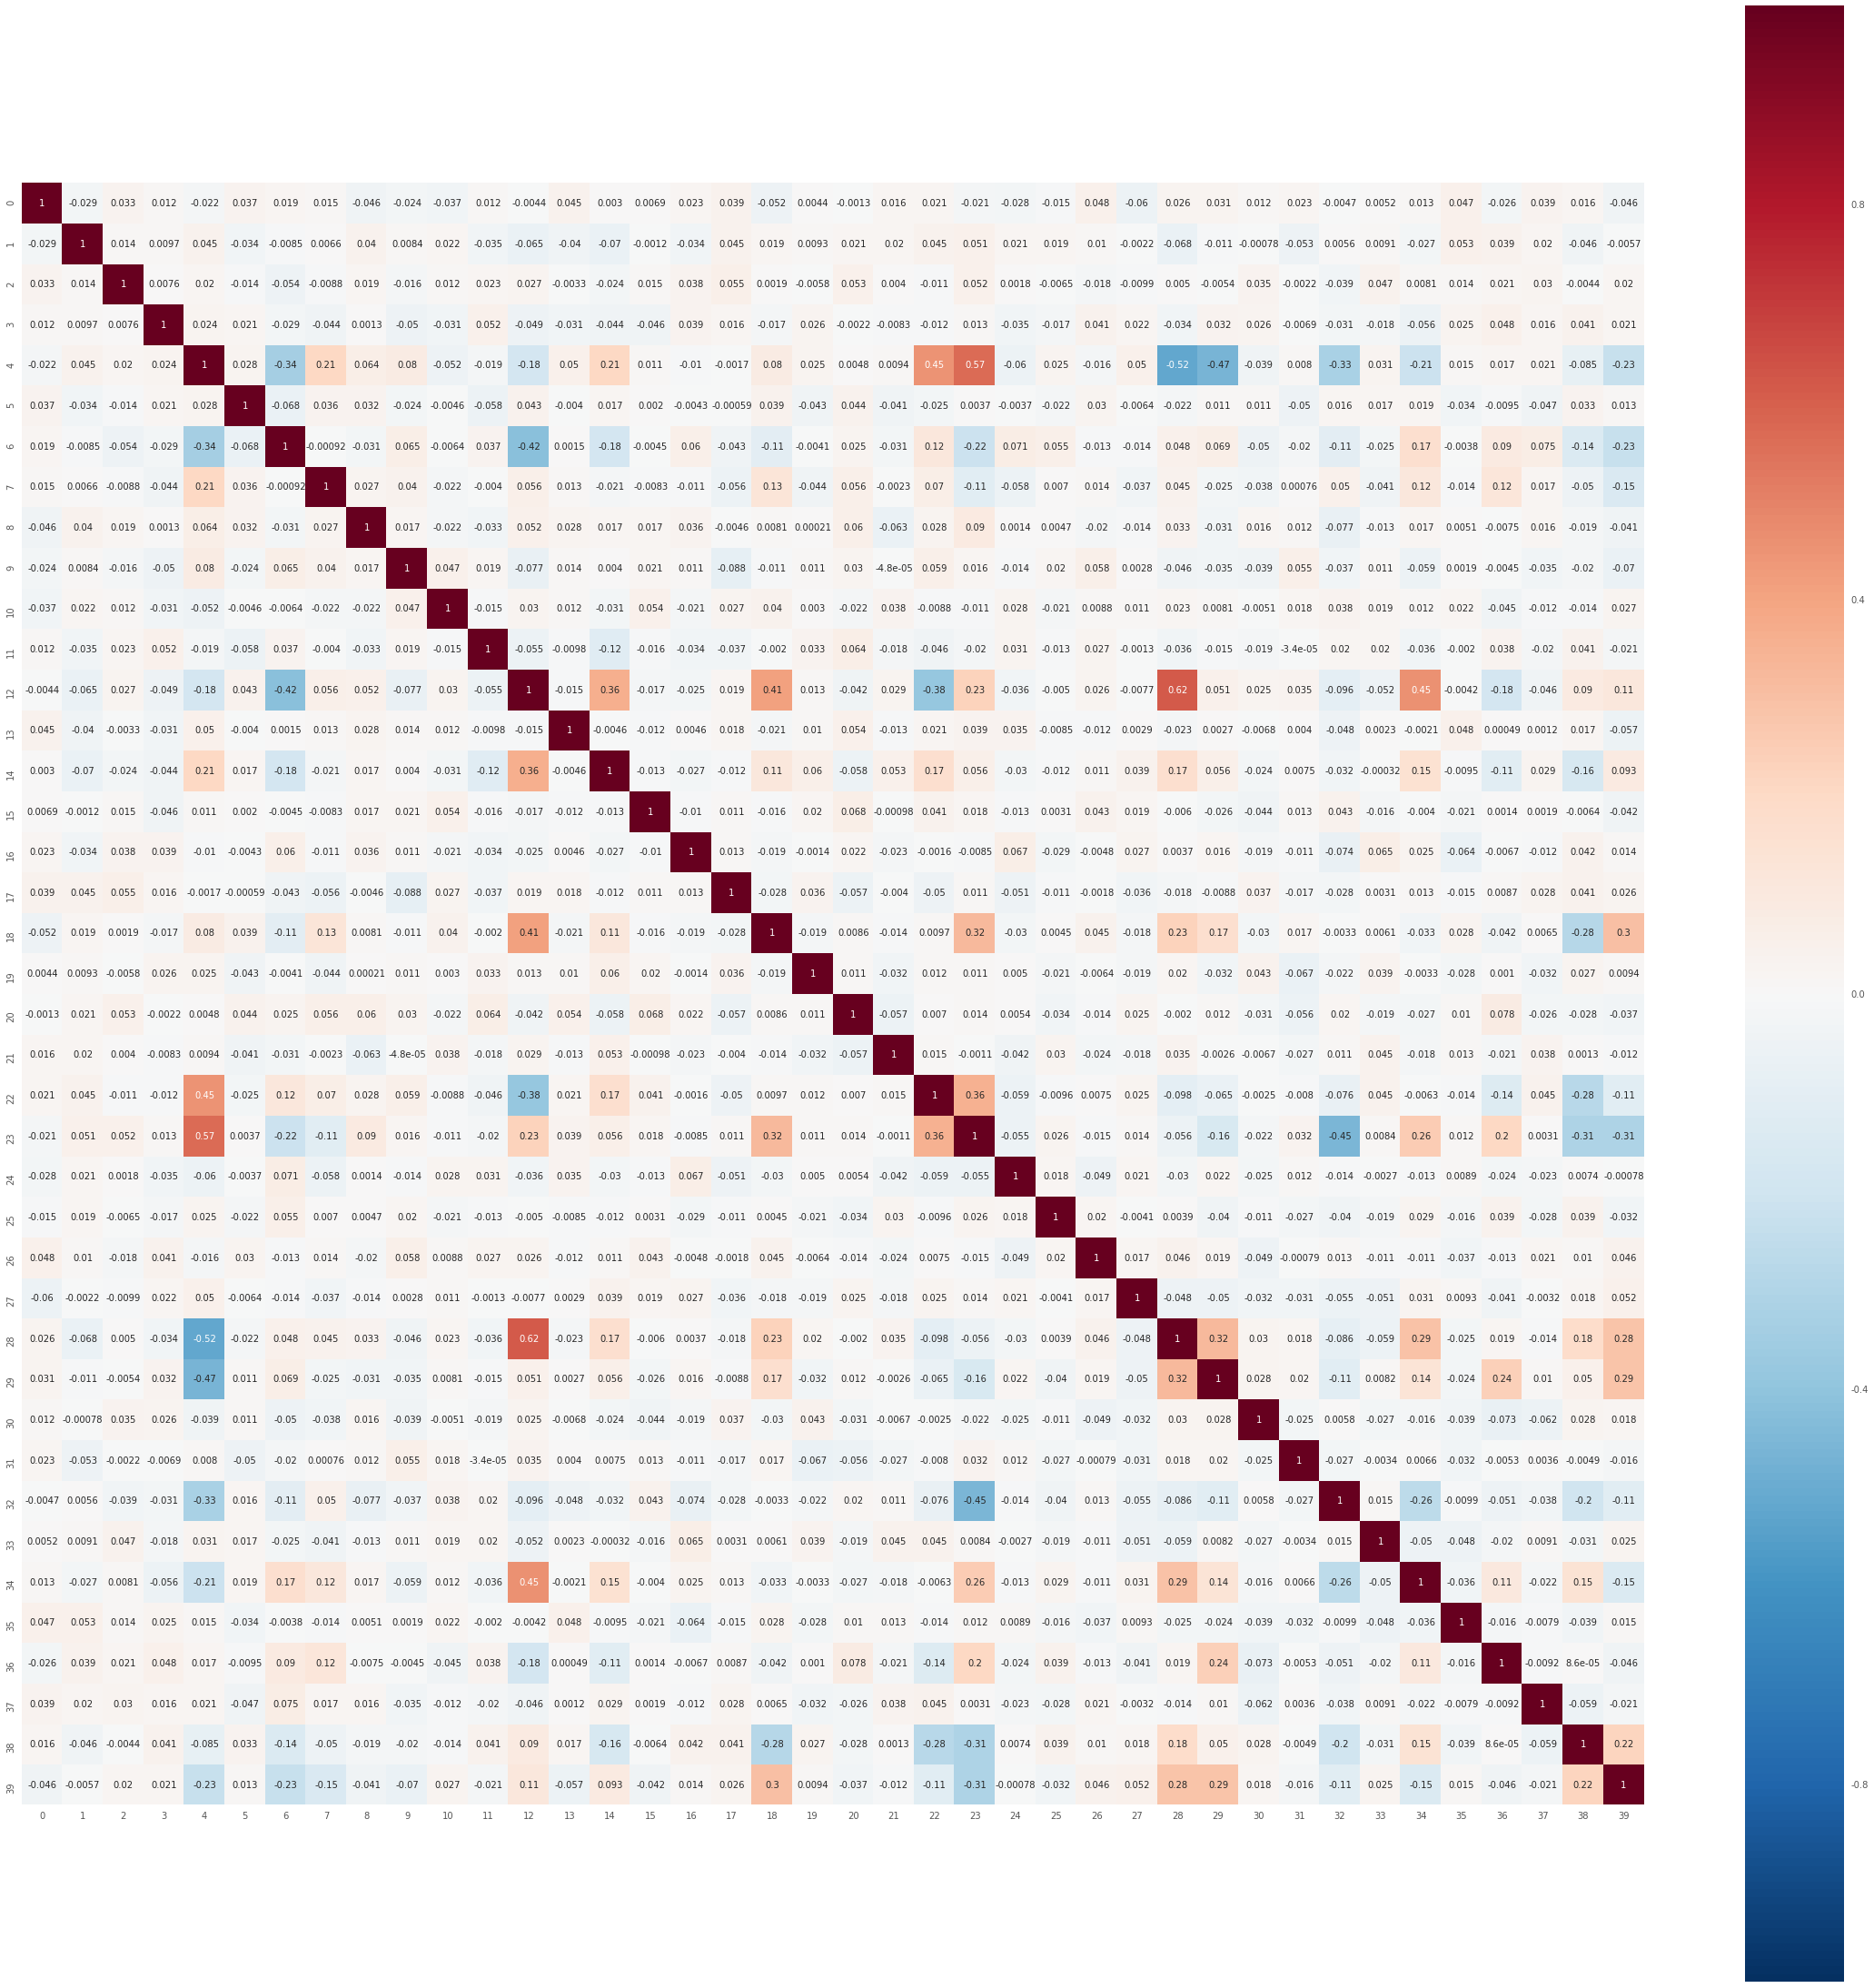

In [8]:
import seaborn as sns
plt.rcParams['font.family']='DFKai-SB' #顯示中文
plt.figure(figsize=(40,40))
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r") #center=0, cmap="YlGnBu"
#sns.plt.show()

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train, y_train)

print(metrics.classification_report(y_train, knn.predict(X_train)))
print(metrics.confusion_matrix(y_train, knn.predict(X_train)))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96       490
          1       0.96      0.96      0.96       510

avg / total       0.96      0.96      0.96      1000

[[468  22]
 [ 21 489]]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [10]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, criterion='gini', max_features='auto', oob_score=True)
rfc.fit(X_train, y_train) #不標準化

print("oob_score(accuary):",rfc.oob_score_)
print(metrics.classification_report(y_train, rfc.predict(X_train)))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


oob_score(accuary): 0.88
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       490
          1       1.00      1.00      1.00       510

avg / total       1.00      1.00      1.00      1000



In [11]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print(metrics.classification_report(y_train, gnb.predict(X_train)))
print(metrics.confusion_matrix(y_train, gnb.predict(X_train)))

             precision    recall  f1-score   support

          0       0.83      0.84      0.83       490
          1       0.84      0.83      0.84       510

avg / total       0.83      0.83      0.83      1000

[[410  80]
 [ 86 424]]


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel="rbf", probability=True)
svc.fit(X_train, y_train)

print(metrics.classification_report(y_train, svc.predict(X_train)))
print(metrics.confusion_matrix(y_train, svc.predict(X_train)))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       1.00      1.00      1.00       490
          1       1.00      1.00      1.00       510

avg / total       1.00      1.00      1.00      1000

[[490   0]
 [  2 508]]


In [14]:
#from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import xgboost as xgb

clf1 = KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf2 = RandomForestClassifier(n_estimators=500, criterion='gini', max_features='auto', oob_score=True)
#clf3 = GaussianNB()
clf4 = SVC(C=1.0, kernel="rbf", probability=True)
meta_clf = xgb.XGBClassifier(n_estimators= 2000, max_depth= 4)
stacking_clf = StackingClassifier(classifiers=[clf1, clf2, clf4], meta_classifier=meta_clf)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
#clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)

print('KNN Score:',clf1.score(X_train, y_train))
print('RF Score:',clf2.score(X_train, y_train))
#print('GNB Score:',clf3.score(X_train, y_train))
print('SVC Score:',clf4.score(X_train, y_train))
print('Stacking Score:',stacking_clf.score(X_train, y_train))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/mlxtend/classifier/stacking_classification.py:126: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X, y)
/opt/con

KNN Score: 0.957
RF Score: 1.0
SVC Score: 0.998
Stacking Score: 1.0


In [15]:
row_id = [i for i in range(1,9001)]

In [16]:
pred = stacking_clf.predict(X_test)

# Generate Submission File 
StackingSubmission = pd.DataFrame({ 'Id': row_id, 'Solution': pred })[["Id","Solution"]]
StackingSubmission.to_csv("submission_xgb_3m_stk.csv", index=False)

In [ ]:
##xgb 4m score: 0.86810
##xgb 3m score: 0.87071
